In [1]:
import pandas as pd
import numpy as np

In [2]:
#from google.colab import files
#uploder = files.upload()

In [3]:
Data = pd.read_csv('HSE Week 5 titanic.csv')

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


в файле titanic.csv каждая строчка наборов данных содержит следующие поля:

- `Survived` - целевая переменная, выжил пассажир или нет

- `Pclass` — класс пассажира (1 — высший, 2 — средний, 3 — низший);

- `Name` — имя;

- `Sex` — пол;

- `Age` — возраст;

- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника;

- `Ticket` — номер билета;

- `Fare`— плата за проезд;

- `Cabin` — каюта;

- `Embarked` — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).
 

In [6]:
X = Data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = Data['Survived']

In [7]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
X = X.fillna({'Age': X.Age.mean(), 'Embarked': 'None'})

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


##### Для обучения регрессии небходимо перевести все столбцы из строкового типа к числовому

In [10]:
X.Sex.unique()

array(['male', 'female'], dtype=object)

In [11]:
X.Sex = X.Sex.map({'male': 1, 'female': 0})

In [12]:
X.Embarked.unique()

array(['S', 'C', 'Q', 'None'], dtype=object)

In [13]:
X = pd.get_dummies(X, columns=['Embarked'])

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Sex            891 non-null    int64  
 2   Age            891 non-null    float64
 3   SibSp          891 non-null    int64  
 4   Parch          891 non-null    int64  
 5   Fare           891 non-null    float64
 6   Embarked_C     891 non-null    uint8  
 7   Embarked_None  891 non-null    uint8  
 8   Embarked_Q     891 non-null    uint8  
 9   Embarked_S     891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.4 KB


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)

StandardScaler()

In [20]:
X_train = scaler.transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression()

In [24]:
clf.fit(X_train, y_train)

LogisticRegression()

In [25]:
clf.coef_.shape

(1, 10)

Для отмастштабированных признаков веса показывают важность этих признаков

In [45]:
sorted_weights = sorted(zip(clf.coef_.ravel(), X.columns), reverse=True)

In [46]:
weights = [x[0] for x in sorted_weights]

In [47]:
features = [x[1] for x in sorted_weights]

In [48]:
df = pd.DataFrame({'features': features, 'weights':weights})

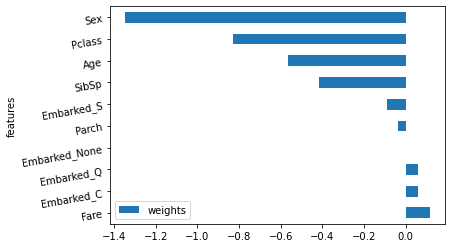

In [67]:
ax = df.plot.barh(x='features', y='weights', rot=10,)

In [50]:
def logistic_function(x):
    return 1/(1 + np.exp(-x))

In [51]:
import matplotlib.pyplot as plt

In [52]:
x = np.linspace(-10, 10, 1000)

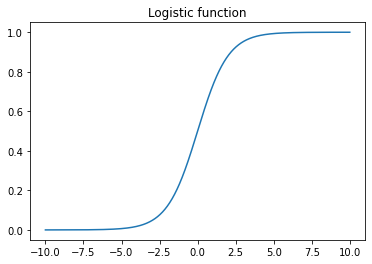

In [53]:
plt.plot(x, logistic_function(x))
plt.title('Logistic function')
plt.show()

In [54]:
pred_prob = logistic_function(np.dot(X_test, clf.coef_.T) + clf.intercept_)

Можно сделать то же самое встроенными функциями.
Оценим вероятность принадлежности к классу "1" [:,1]

In [55]:
predict_proba = clf.predict_proba(X_test)[:,1]

In [56]:
np.all([pred_prob.ravel(), predict_proba])

True

Метод predict выдаёт не вероятности отношения к тому или иному классу, а метки класса (1,0 и проч)

In [68]:
np.mean(clf.predict(X_test) == y_test)

0.7533632286995515

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_test, clf.predict(X_test))

0.7533632286995515

(array([139.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  84.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

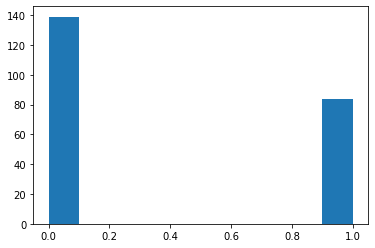

In [60]:
plt.hist(y_test)

(array([54., 45., 23.,  9.,  9., 13., 21.,  7., 18., 24.]),
 array([0.02816497, 0.12174561, 0.21532626, 0.30890691, 0.40248756,
        0.49606821, 0.58964885, 0.6832295 , 0.77681015, 0.8703908 ,
        0.96397145]),
 <BarContainer object of 10 artists>)

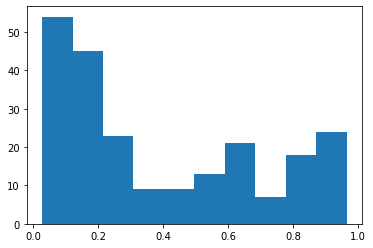

In [61]:
plt.hist(clf.predict_proba(X_test)[:, 1])

In [62]:
predict_proba = clf.predict_proba(X_test)[:, 1]

In [63]:
np.mean(y_test[(predict_proba > 0.75) & (predict_proba < 0.85)])

0.8235294117647058